<a href="https://colab.research.google.com/github/vaibhavi128/Pytorch-deep-learning/blob/main/Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Write a program to generate following logic functions using McCulloch-Pitts neuron and appropriate values for weights, bias and threshold***

In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import numpy as np

In [2]:
class XORClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

In [3]:
model = XORClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
# Printing a module shows all its submodules
print(model)

XORClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [4]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


In [5]:
size = 50 # samples
std=0.1
data = torch.randint(low=0, high=2, size=(size, 2), dtype=torch.float32)
data += std * torch.randn(data.shape)
data

tensor([[ 0.1187,  0.0050],
        [-0.0600,  1.0764],
        [ 1.0721,  1.0133],
        [ 0.9477, -0.0632],
        [ 0.0482,  0.0271],
        [ 0.8225, -0.0557],
        [ 1.0348,  1.0979],
        [ 0.9512,  0.1423],
        [ 0.0064, -0.1808],
        [ 1.0472,  1.1423],
        [ 1.0792,  1.0493],
        [-0.0238, -0.0293],
        [ 0.9503,  0.9042],
        [ 0.9378, -0.0464],
        [ 1.1795,  1.0233],
        [-0.0902,  0.0300],
        [ 0.0419, -0.1325],
        [ 1.0323,  1.1346],
        [ 0.8377, -0.1384],
        [ 0.0033, -0.1223],
        [ 1.0063,  0.7964],
        [ 0.0418,  1.1230],
        [ 0.9798,  1.1369],
        [-0.1779,  1.1384],
        [-0.0050,  1.2850],
        [-0.0256,  0.8989],
        [ 0.1432,  1.0435],
        [-0.0573,  1.0209],
        [ 0.9693, -0.0481],
        [ 0.0495,  1.0737],
        [ 1.0041,  0.0339],
        [ 0.8711,  0.1603],
        [ 1.0452,  1.0075],
        [ 0.9087,  1.2515],
        [-0.1788,  1.0562],
        [ 1.3036,  0

In [7]:
size = 50 # samples
std=0.1
data = torch.randint(low=0, high=2, size=(size, 2), dtype=torch.float32)
label = (data.sum(dim=1) == 1).to(torch.long)
# To make it slightly more challenging, we add a bit of gaussian noise to the data points.
data += std * torch.randn(data.shape)

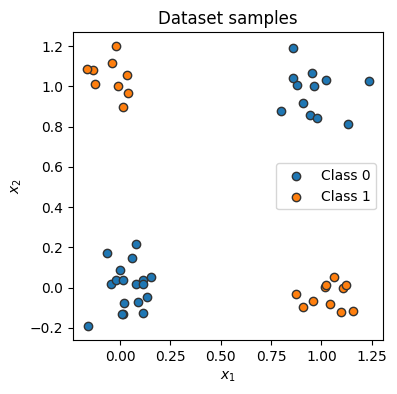

In [8]:
import matplotlib.pyplot as plt
if isinstance(data, torch.Tensor):
    data1 = data.cpu().numpy()
if isinstance(label, torch.Tensor):
    label1 = label.cpu().numpy()
data_0 = data1[label1 == 0]
data_1 = data1[label1 == 1]
plt.figure(figsize=(4,4))
plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
plt.title("Dataset samples")
plt.ylabel(r"$x_2$")
plt.xlabel(r"$x_1$")
plt.legend()
plt.show()

In [12]:
loss_module = nn.BCEWithLogitsLoss()

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [13]:
from tqdm.notebook import tqdm

epochs = 1000
def train_model(model, optimizer, data,label, loss_module, num_epochs=epochs):
    # Set model to train mode
    model.train()
    losses = []
    # Training loop
    for epoch in tqdm(range(num_epochs)):
            ## Step 2: Run the model on the input data
            preds = model(data)
            preds = preds.squeeze(dim=1) # Output is [size, 1], but we want [size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, label.float())
            #print(loss)
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()
            losses.append(loss.item())
            ## Step 5: Update the parameters
            optimizer.step()
            if epoch%20 == 0 :
                print(f'epoch: {epoch} Train loss: {loss.item()}' )

    return losses
losses=train_model(model, optimizer, data,label, loss_module,epochs)

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch: 0 Train loss: 0.748849093914032
epoch: 20 Train loss: 0.6787269115447998
epoch: 40 Train loss: 0.6674124002456665
epoch: 60 Train loss: 0.6640220880508423
epoch: 80 Train loss: 0.6615695953369141
epoch: 100 Train loss: 0.6589940786361694
epoch: 120 Train loss: 0.6560603976249695
epoch: 140 Train loss: 0.6526334881782532
epoch: 160 Train loss: 0.64857017993927
epoch: 180 Train loss: 0.6437039375305176
epoch: 200 Train loss: 0.6378496885299683
epoch: 220 Train loss: 0.6308203339576721
epoch: 240 Train loss: 0.622453510761261
epoch: 260 Train loss: 0.61264568567276
epoch: 280 Train loss: 0.6013843417167664
epoch: 300 Train loss: 0.5887690782546997
epoch: 320 Train loss: 0.5750110745429993
epoch: 340 Train loss: 0.560410737991333
epoch: 360 Train loss: 0.5453173518180847
epoch: 380 Train loss: 0.5300838351249695
epoch: 400 Train loss: 0.5150274038314819
epoch: 420 Train loss: 0.5004048943519592
epoch: 440 Train loss: 0.4864041805267334
epoch: 460 Train loss: 0.4731467068195343
epoch

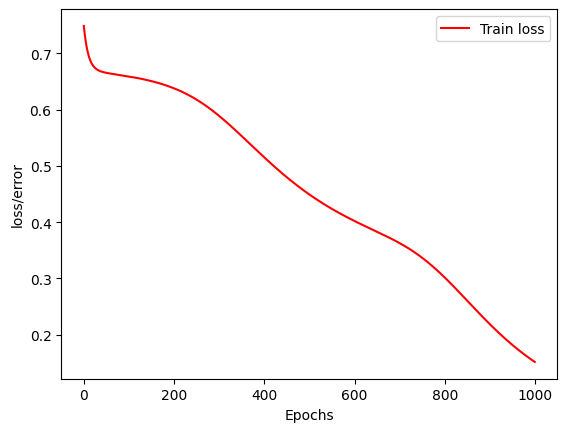

In [14]:
plt.plot(range(epochs),losses,"r",label="Train loss")

plt.ylabel("loss/error")
plt.xlabel("Epochs")
plt.legend()

<Figure size 400x400 with 0 Axes>

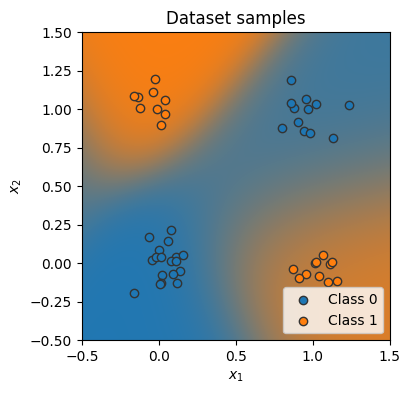

In [15]:
from matplotlib.colors import to_rgba
@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    plt.figure(figsize=(4,4))
    fig = plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    c0 = torch.Tensor(to_rgba("C0"))
    c1 = torch.Tensor(to_rgba("C1"))
    x1 = torch.arange(-0.5, 1.5, step=0.01)
    x2 = torch.arange(-0.5, 1.5, step=0.01)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, data, label)
plt.show()